## Name: Mohamad Jawad ABOU ALEIWI

## Question 1:

Question 1.1:

In [66]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data = fetch_california_housing()
X1 = data.data
y1 = data.target

# add the first column of ones
X1 = np.c_[np.ones(X1.shape[0]), X1]

# split the data for training and testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [67]:
# using normal equation we find the parameters
theta = np.linalg.inv(X_train1.T @ X_train1) @ X_train1.T @ y_train1

# set print options to suppress scientific notation
np.set_printoptions(suppress=True, precision=10)

print(f"Coefficients: {theta}")

# calculate predictions for train and test sets
y_train_pred = X_train1 @ theta
y_test_pred = X_test1 @ theta

Coefficients: [-36.8585691058   0.4333334067   0.0092932434  -0.0986433739
   0.593215487   -0.0000075619  -0.0047451638  -0.4214493359
  -0.4341660414]


In [68]:
# function to calculate the r2 score
def calculate_r2(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((y_true - mean_y_true)**2)
    r2 = 1 - (numerator / denominator)
    return r2

# function to calculate the mse
def calculate_mse(y_true, y_pred):
    mse = np.sum((y_true - y_pred)**2) / len(y_true)
    return mse

# find mse and r2 score for both training and testing sets
mse_train_formula = calculate_mse(y_train1, y_train_pred)
mse_test_formula = calculate_mse(y_test1, y_test_pred)

r2_train_formula = calculate_r2(y_train1, y_train_pred)
r2_test_formula = calculate_r2(y_test1, y_test_pred)

print(f"MSE (Train) using defined function: {mse_train_formula}")
print(f"MSE (Test) using defined function: {mse_test_formula}")

print(f"R-squared (Train) defined function: {r2_train_formula}")
print(f"R-squared (Test) defined function: {r2_test_formula}")

MSE (Train) using defined function: 0.5234413607125449
MSE (Test) using defined function: 0.5289841670365668
R-squared (Train) defined function: 0.6088968118672868
R-squared (Test) defined function: 0.5943232652467384


In [69]:
# calculate mse and r2 score using sktlearn
mse_train = mean_squared_error(y_train1, y_train_pred)
mse_test = mean_squared_error(y_test1, y_test_pred)

r2_train = r2_score(y_train1, y_train_pred)
r2_test = r2_score(y_test1, y_test_pred)

print(f"MSE (Train) using sklearn: {mse_train}")
print(f"MSE (Test) using sklearn: {mse_test}")

print(f"R-squared (Train) using sklearn: {r2_train}")
print(f"R-squared (Test) using sklearn: {r2_test}")

MSE (Train) using sklearn: 0.5234413607125449
MSE (Test) using sklearn: 0.5289841670365668
R-squared (Train) using sklearn: 0.6088968118672868
R-squared (Test) using sklearn: 0.5943232652467384


The values provided by the sklearn and the defined functions are the same.

Question 1.2:

We use the following formulas to find the confidence interval;

$$\hat{\sigma}^2_ = \frac{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}{(n - p - 1)}$$


$$T = \frac{\hat{\theta} - \theta^*}{\hat{\sigma} \sqrt{[(X^TX)^{-1}]}}$$


In [70]:
from scipy.stats import t

n,p = X_train1.shape
alpha = 0.01 

# calculate the quantile
t_critical = t.ppf(1 - alpha / 2, df=n - p - 1)

# calculate sigma hat
sigma_hat_square = np.sum((y_train1 - X_train1 @ theta)**2) / ( n - p - 1 )

# test statistics
se = np.sqrt(sigma_hat_square * np.diag(np.linalg.inv(X_train1.T @ X_train1)))

# calculate the boundaries
lower_bound = theta - t_critical * se
upper_bound = theta + t_critical * se

# pair the lower and upper bounds
CI = list(zip(lower_bound, upper_bound))
CI

# note that we will have 9 CI, because we have 8 features and one for theta0

[(-38.75792008424616, -34.95921812741965),
 (0.42128430921030635, 0.4453825041726156),
 (0.008009596810883979, 0.010576889937813212),
 (-0.1155703896740623, -0.08171635809113781),
 (0.5130678288016202, 0.6733631452405682),
 (-2.1120699209367435e-05, 5.996849173694178e-06),
 (-0.007007102876729952, -0.002483224786914409),
 (-0.4421934649558224, -0.4007052069225941),
 (-0.4558852768426896, -0.4124468059171779)]

## Question 2:

Question 2.1:

In [71]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

file_path = r'data.csv' 
df = pd.read_csv(file_path)

# let's display the first five recordings of the data set
display(df.head())

,-1.298173374733184726e+00,-1.622490637183908735e-01,1.223379369153350549e+00,1.355554339582927481e+00,1.080170627962381058e+00,6.349793274139390320e-01,2.987410831264468158e-01,5.482702692046558246e-01,7.317733641828934044e-01,1.018645435297013568e+00,...,5.882777992748500218e-01,2.101056224387073124e-01,1.861458271316984936e+00,-4.363994858971800839e-01,2.792989402465480553e-01,-1.416019733199122221e+00,-2.332362908037092009e+00,2.150961139501001429e-01,-6.933193671119128876e-01,1.510000000000000000e+02
0,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
1,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
2,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
3,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0
4,1.513286,0.072830,1.243039,-0.368609,-0.564998,-1.736720,-0.441544,-1.395122,-1.550146,0.941235,...,0.767162,0.417754,-1.010548,1.397951,0.074975,1.381528,-1.367316,1.200057,-0.292088,97.0


In [72]:
# independent variables, features
X = df.iloc[:, 1:-1].to_numpy()

# dependent varaible, which is the last column
y = df.iloc[:, -1].to_numpy()

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# standardizing training and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train.reshape(len(y_train),-1)).reshape(len(y_train))
y_test = scaler.transform(y_test.reshape(len(y_test),-1)).reshape(len(y_test))

Question 2.2:

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# fit  a regular OLS
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# predicted values
y_train_pred22 = ols_model.predict(X_train)
y_test_pred22 = ols_model.predict(X_test)

# r2 score on training and testing sets
r2_train22 = r2_score(y_train, y_train_pred22)
r2_test22 = r2_score(y_test, y_test_pred22)

# mse on training and testing sets
mse_train22 = mean_squared_error(y_train, y_train_pred22)
mse_test22 = mean_squared_error(y_test, y_test_pred22)

print("R-squared (training):", r2_train22)
print("R-squared (test):", r2_test22)

print("MSE (training):", mse_train22)
print("MSE (test):", mse_test22)

R-squared (training): 0.4145165592367207
R-squared (test): 0.3185151126134631
MSE (training): 0.5854834407632793
MSE (test): 0.6789900218301574


## Variable Selection

## Question 3:

For the Forward Variable Selection we use the following formulas: 

Noise estimation :

$$\hat{\sigma}^2(Y, \tilde{X}_k)=\frac{1}{n-2} ||Y-X_k \hat{\theta}(Y, \tilde{X}_k)||^2$$
<br><br><br>
Statistical test :

$$\hat{T}(Y, \tilde{X}_k) = \frac{\left|\tilde{\theta}(Y, \tilde{X}_k)\right|}{\hat{\sigma}(Y, \tilde{X}_k) \sqrt{(\mathbf{X}^T \mathbf{X})^{-1}_{(0,0)}}
}$$
<br><br><br>
p-value :

$$p-value = 2(1-\Phi(\hat{T}_{k}))$$

<br><br><br>
$Y$ update : 

$$Y_i = Y_i - X_{k^*}\hat{\theta}(Y, X_k)$$

Where $X_{k^*}$ denotes the feature with the lowest p-value at iteration $k^*$


In [74]:
import matplotlib.pyplot as plt
import scipy.stats


# find the p-values based on the baove formulas
def find_p_value(X, y):
    
    # fit the model, based on one feature
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    theta = reg.coef_[0]
    
    # calculate the value of test T
    sigma = np.sqrt(1/(len(y) - 2) * np.sum((y - y_pred)**2))
    d = np.linalg.inv(X.T @ X)[0, 0]**0.5
    T = theta / (sigma * d)
    
    
    t = scipy.stats.t.ppf(1 - 0.05/2, len(y) - 2)
            
    # p-value
    p = 2 * (1 - scipy.stats.t.cdf(abs(T), len(y) - 2))
    
    return p

In [75]:
def find_min_p_value(X, y, S):
    p_values = []
    
    # find p-values for each feature
    for i in range(X.shape[1]):
        p_values.append(find_p_value(X[:, i].reshape(-1, 1), y))
        
    list_p_values = list(p_values)
    
    # exclude the feature presented in S
    for i in S:
        p_values[i] = 1
        
    return p_values.index(min(p_values)), min(p_values), list_p_values

The selected features are:  [33, 57, 78, 166, 134, 122, 52, 158, 207, 129]


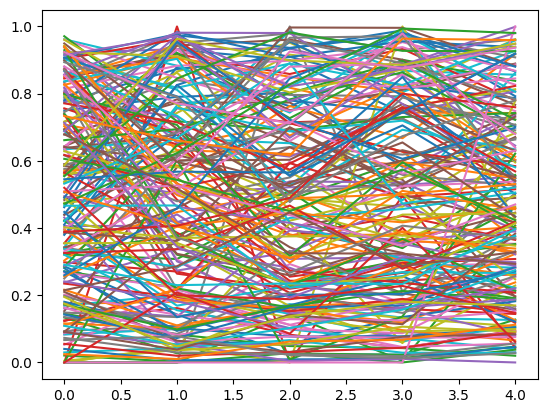

In [76]:
# empty set
S = []

X_update = X_train.copy()
y_update = y_train.copy()

lists_p_values = []
current_value = 0
j = 0

while current_value < 0.05:
    i, current_value, list_p_values = find_min_p_value(X_update, y_update, S)
    
    # add the index of the feature to the set
    S.append(i)
    
    # update y
    y_update = y_update - LinearRegression().fit(X_update[:, i].reshape(-1, 1), y_update).predict(X_update[:, i].reshape(-1, 1))
    
    if j < 5:
        lists_p_values.append(list_p_values)
    j += 1
    
print("The selected features are: ", S) 

# plot the p-value for each feature at the first 5 iterations
for coeff_vals in (list(zip(*lists_p_values))):
    plt.plot(coeff_vals)

plt.show()

Significance of p-values:

In forward variable selection for regression models, the p-value serves as a crucial metric for evaluating the significance of predictor variables.

The iterative process involves selecting the predictor with the smallest p-value at each iteration.

This predictor is included in the model (set S), and its effect is incorporated by subtracting its residuals from the response variable. 

The residuals represent the unexplained variation in the response after considering the predictors already in the model.

By isolating this unexplained variation, the next iteration focuses on identifying predictors that contribute unique information to the model.

This iterative approach prevents overfitting by adding only statistically significant predictors, enhancing the model's ability to capture meaningful relationships without incorporating noise.

Subtracting the predicted values:

It removes the variation explained by the predictors included in the model, leaving behind the unexplained portion. 

This step ensures orthogonality among predictors, preventing redundancy in explaining the same variation. 

The forward selection process continues iteratively, with each newly added predictor enhancing the model's explanatory power by addressing the remaining unexplained variation in the response.

This systematic approach helps build a parsimonious and robust model that captures the essential relationships between predictors and the response variable while avoiding the pitfalls of overfitting.


In [77]:
selected_X_train = X_train[:, S]
selected_X_test = X_test[:, S]

# fit the OLS model on the training data with selected features
ols_model_selected = LinearRegression()
ols_model_selected.fit(selected_X_train, y_train)

# make predictions on the test data with selected features
y_train_selected = ols_model_selected.predict(selected_X_train)
y_test_selected = ols_model_selected.predict(selected_X_test)

# calculate the r2 score
r2_selected_train = r2_score(y_train, y_train_selected)
r2_selected_test = r2_score(y_test, y_test_selected)

print("R-squared score (testing):", r2_selected_train)
print("R-squared score (training):", r2_selected_test)

# calculate the mse
mse_train = mean_squared_error(y_train, y_train_selected)
mse_test = mean_squared_error(y_test, y_test_selected)

print("MSE (testing):", mse_train)
print("MSE (training):", mse_test)

R-squared score (testing): 0.5306898623152638
R-squared score (training): 0.4876889549360357
MSE (testing): 0.4693101376847361
MSE (training): 0.510435512379176


## Extensions

In [78]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt

# a general function, denote by alpha the penalty parameter
def regression_analysis(model_type, X_train, y_train, X_test, y_test, alpha_values):
    
    train_r2 = []
    test_r2 = []
    
    mse_train = []
    mse_test = []
    
    thetas = []

    for alpha in alpha_values:
        # choose the model, based on model_type
        if model_type == 'ridge':
            model = Ridge(alpha=alpha, fit_intercept=False)
        elif model_type == 'lasso':
            model = Lasso(alpha=alpha, fit_intercept=False)
        elif model_type == 'elasticnet':
            model = ElasticNet(alpha=alpha, l1_ratio=0.5, fit_intercept=False)

        # fit the model on the training set
        model.fit(X_train, y_train)

        # make predictions on the training and test sets
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)

        # calculate r2 score and store in respective lists
        train_r2.append(r2_score(y_train, Y_train_pred))
        test_r2.append(r2_score(y_test, Y_test_pred))
        
        mse_train.append(mean_squared_error(y_train, Y_train_pred))
        mse_test.append(mean_squared_error(y_test, Y_test_pred))
        
        thetas.append(model.coef_)

    # convert thetas to a numpy array
    thetas = np.array(thetas)
    
    # display the maximum r2 socre and minimum MSE
    print("Maximum R-squared score (training): ", max(train_r2))
    print("Maximum R-squared score (test): ", max(test_r2))
    
    print("Minimum MSE (training): ", min(mse_train))
    print("Minimum MSE (test): ", min(mse_test))

    # plot the coefficients against penalty
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(alpha_values, thetas)
    ax.set_xscale('log')
    ax.set_xlabel('alpha')
    ax.set_ylabel('Coefficients')
    ax.set_title(f'{model_type.capitalize()} coefficients vs penalty parameter')
    plt.show()

    # plot the R2 scores against penalty
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.plot(alpha_values, train_r2, '-D', markevery=[np.argmax(train_r2)], label='Training set')
    ax.plot(alpha_values, test_r2, '-D', markevery=[np.argmax(test_r2)], label='Test set')
    ax.set_xscale('log')
    ax.set_xlabel('alpha')
    ax.set_ylabel('R2 Score')
    ax.set_title(f'{model_type.capitalize()} R2 Score vs penalty parameter')
    ax.legend()
    plt.show()


## Question 4:

Maximum R-squared score (training):  0.5837533143061102
Maximum R-squared score (test):  0.4310311796032795
Minimum MSE (training):  0.4162466856938898
Minimum MSE (test):  0.5668858678046164


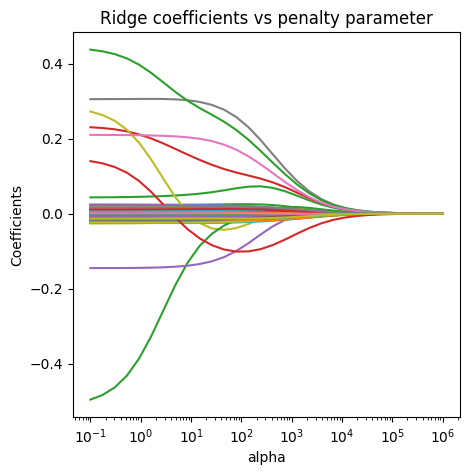

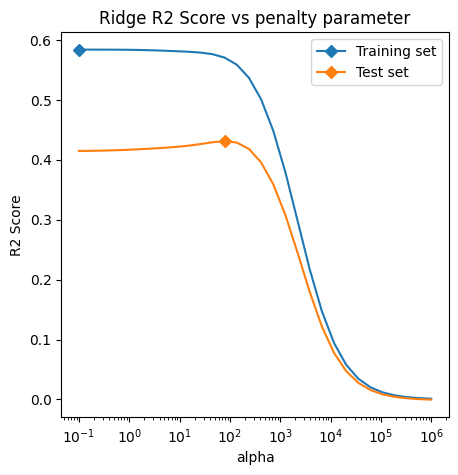

In [79]:
# apply the function to Ridge model
regression_analysis('ridge', X_train, y_train, X_test, y_test, np.logspace(-1, 6, num=30, base=10))

## Question 5:

Maximum R-squared score (training):  0.5832570537584458
Maximum R-squared score (test):  0.5213887087267148
Minimum MSE (training):  0.4167429462415541
Minimum MSE (test):  0.476859130884122


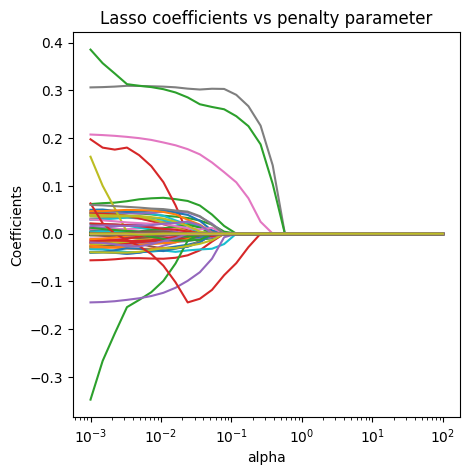

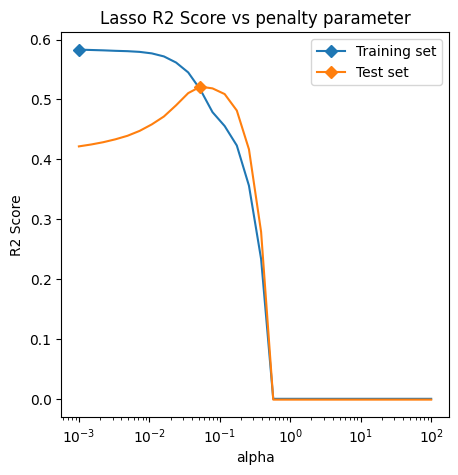

In [80]:
# apply the function to Lasso model
regression_analysis('lasso', X_train, y_train, X_test, y_test, np.logspace(-3, 2, num=30, base=10))

## Question 6:

Maximum R-squared score (training):  0.583556780808079
Maximum R-squared score (test):  0.5178498010543605
Minimum MSE (training):  0.41644321919192095
Minimum MSE (test):  0.48038508287833537


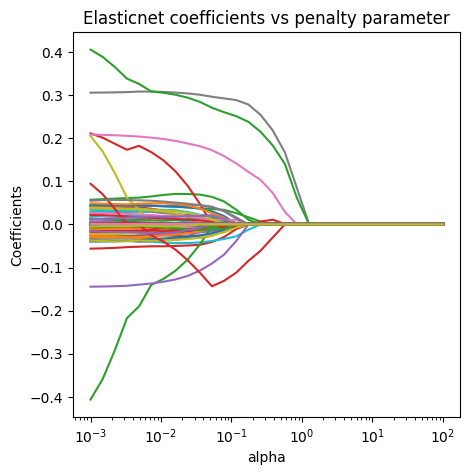

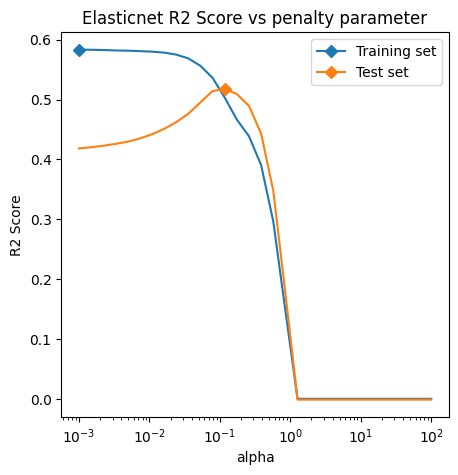

In [81]:
# apply the function to Elasticnet model
regression_analysis('elasticnet', X_train, y_train, X_test, y_test, np.logspace(-3, 2, num=30, base=10))

## PCR

## Question 7:

Question 7.a: 

In [82]:
# calculate the covariance matrix
cov_matrix = X_train.T @ X_train

# computing the singular value decomposition of the covariance matrix
U, s, V = np.linalg.svd(cov_matrix)

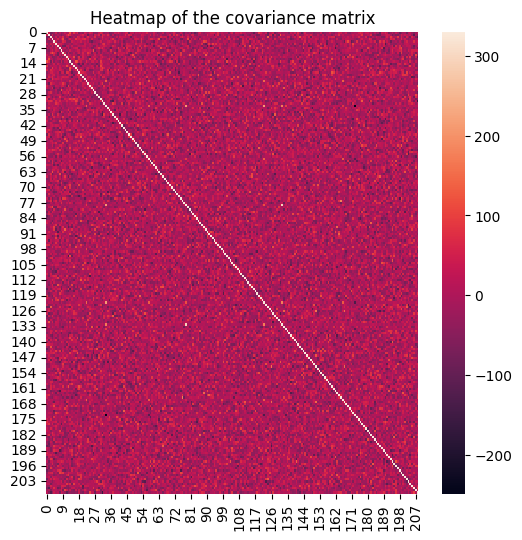

In [83]:
import seaborn as sns

# ploting the heatmap
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cov_matrix)
plt.title("Heatmap of the covariance matrix")
plt.show()

When two covariates are strongly positive correlated, the value of the element will be in the heatmap to the white zones.

If two covariates are less correlated the value of the element decreases and in the heatmap is seen as darker colors.


The majority of the colors in the heatmap corresponding to the covariance matrix fall in the range of -0.2 to 0.2, it indicates that the variables in the dataset have weak linear relationships or are nearly uncorrelated.

*Values close to 0 suggest a weak or no linear relationship between the variables.

*Positive values close to 0.2 indicate a weak positive linear relationship (as one variable increases, the other tends to increase).

*Negative values close to -0.2 indicate a weak negative linear relationship (as one variable increases, the other tends to decrease).

Question 7.b:

In [84]:
def PCA(X, k):
    # compute covariance matrix of features
    cov_mat = X.T @ X

    # SVD
    U, s, V = np.linalg.svd(cov_mat)

    # select eigenvectors according to the degree k
    eigen_vectors_subset = U[:, :k]

    X_reduced = X @ eigen_vectors_subset

    return X_reduced

Question 7.c:

The Explained Variance is given by:

$$\text{Explained Variance}(i) = \frac{\sum_{j=1}^{i} \sigma_j}{\sum_{j=1}^{n} \sigma_j}$$

where:

i is the index of the principal component.


$\sigma_j$ is the j-th singular value.

n is the total number of singular values.

Number of variables needed for 90% variance: 44


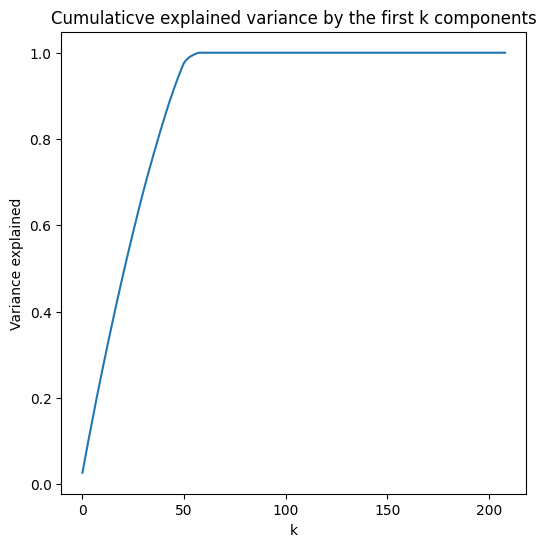

In [85]:
k_90_percent = np.argmax(np.cumsum(s) / np.sum(s) > 0.9)
print(f'Number of variables needed for 90% variance: {k_90_percent}')

# plotting the cumulative explained variance by the first k components
plt.figure(figsize=(6, 6))
plt.plot(np.cumsum(s)/np.sum(s))
plt.title('Cumulaticve explained variance by the first k components')
plt.xlabel('k')
plt.ylabel('Variance explained')
plt.show()

Question 7.d:

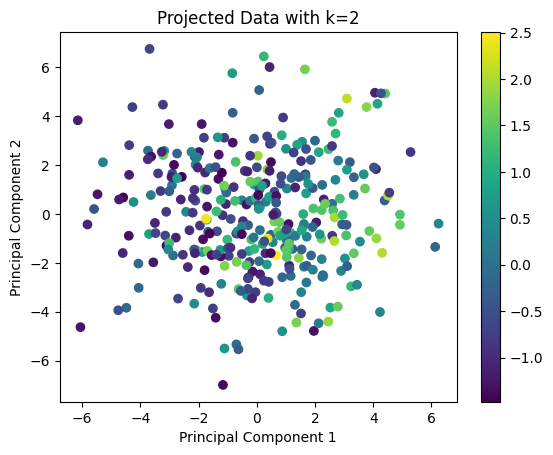

In [86]:
projected_data = PCA(X_train, 2)
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data with k=2')
plt.colorbar()
plt.show()

The spread along principal component axes reflects the variance captured by each component, with a wider spread indicating more captured variance.

Detecting clusters or patterns in the data suggests groups with similar properties, while color gradients along a direction may indicate a correlation between the dependent variable and the data's structure as captured by principal components.

Notably, outliers with extreme values of the dependent variable may be influential and merit further analysis.

Question 7.e:

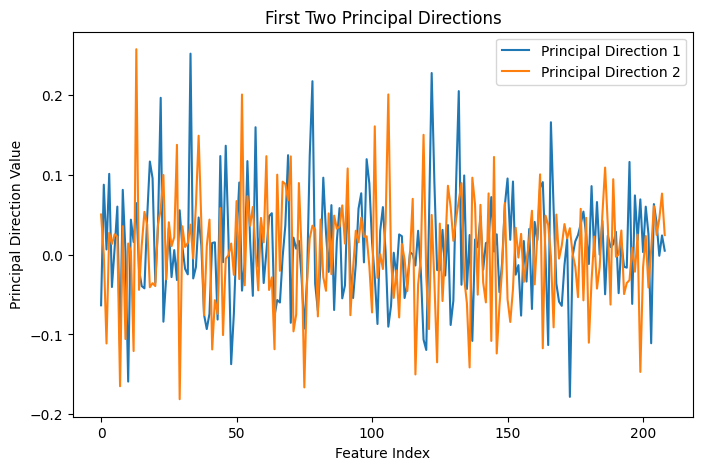

In [87]:
import matplotlib.pyplot as plt

# plot for each vector the value vs the axis of features indices
plt.figure(figsize=(8, 5))
plt.plot(U[:, 0], label='Principal Direction 1')
plt.plot(U[:, 1], label='Principal Direction 2')

plt.title('First Two Principal Directions')
plt.xlabel('Feature Index')
plt.ylabel('Principal Direction Value')

plt.legend()
plt.show()

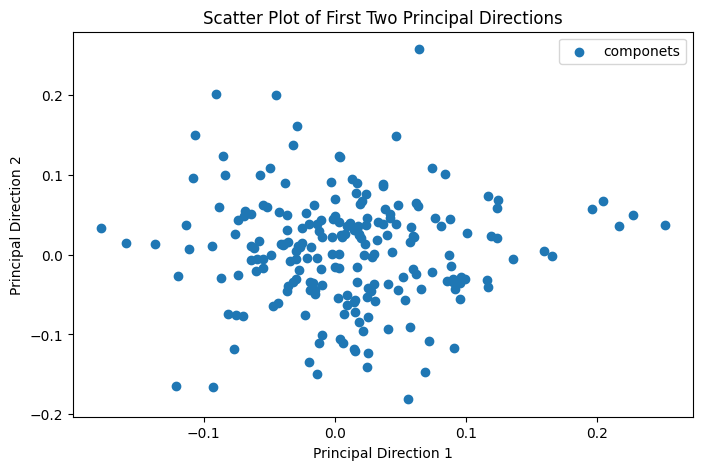

In [88]:
# representation in form of a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(U[:, 0], U[:, 1], label="componets")

plt.title('Scatter Plot of First Two Principal Directions')
plt.xlabel('Principal Direction 1')
plt.ylabel('Principal Direction 2')

plt.legend()
plt.show()

The first two prinicipal direction must be orthogonal, thus their linear product is zero.

Question 7.f:

Number of components(testing): 24
Number of components(training): 48
Maximum R2(traning): 0.4114388073233146
Maximum R2(testing): 0.247357076945521
Minimum MSE(traning):  0.5885611926766854
Minimum MSE(testing):  0.7498875532146835


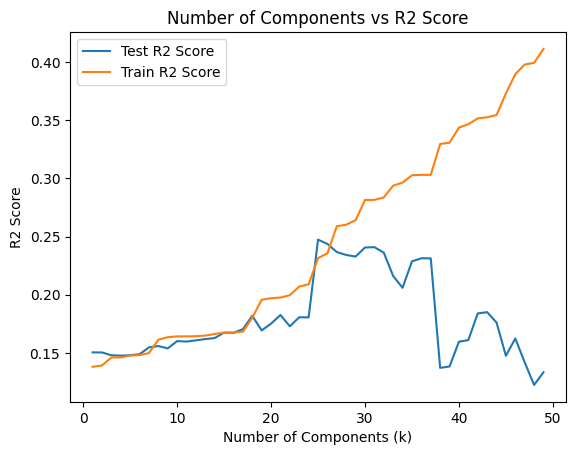

In [89]:
import matplotlib.pyplot as plt

r2_pcas_test = []
r2_pcas_train = []

mse_pcas_test = []
mse_pcas_train = []

k_values = list(range(1, 50))
test_scores = []
train_scores = []

for i in k_values:
    # project data using k directions
    X_train_scaled_pca = X_train.dot(U[:, :i])
    X_test_scaled_pca = X_test.dot(U[:, :i])
    
    # fit the OLS after PCA
    reg = LinearRegression()
    reg.fit(X_train_scaled_pca, y_train)
    yhat = reg.predict(X_test_scaled_pca)
    r2_pcas_test.append(r2_score(y_test, yhat))
    r2_pcas_train.append(r2_score(y_train, reg.predict(X_train_scaled_pca)))
    
    # store R2 scores for each k value
    test_scores.append(r2_score(y_test, yhat))
    train_scores.append(r2_score(y_train, reg.predict(X_train_scaled_pca)))
    
    mse_pcas_test.append(mean_squared_error(y_test, yhat))
    mse_pcas_train.append(mean_squared_error(y_train, reg.predict(X_train_scaled_pca)))

# finding best r2 score for training and testing
best_r2_test = max(r2_pcas_test)
best_r2_train = max(r2_pcas_train)

best_mse_test = min(mse_pcas_test)
best_mse_train = min(mse_pcas_train)

# finding component of best score for training and testing
best_n_components_test = r2_pcas_test.index(best_r2_test)
best_n_components_train = r2_pcas_train.index(best_r2_train)
print('Number of components(testing): ' + str(best_n_components_test))
print('Number of components(training): ' + str(best_n_components_train))

print('Maximum R2(traning): ' + str(best_r2_train))
print('Maximum R2(testing): ' + str(best_r2_test))

print('Minimum MSE(traning): ' ,best_mse_train)
print('Minimum MSE(testing): ' ,best_mse_test)

# plotting k vs r2 scores for test and train
plt.plot(k_values, test_scores, label='Test R2 Score')
plt.plot(k_values, train_scores, label='Train R2 Score')
plt.xlabel('Number of Components (k)')
plt.ylabel('R2 Score')
plt.title('Number of Components vs R2 Score')
plt.legend()
plt.show()

## Question 8:

In [90]:
import pandas as pd

# summarize all the results in a dataframe
data_result = {
    'Model': ['OLS', 'FVS', 'Ridge', 'Lasso', 'Elasticnet', 'PCA'],
    'Rsquared(training)': [0.4145165592367207, 0.4876889549360357, 0.4310311796032795, 0.5213887087267148, 0.5178498010543605, 0.4114388073233146],
    'Rsquared(test)': [0.3185151126134631, 0.5306898623152638, 0.5837533143061102, 0.5832570537584458, 0.583556780808079, 0.247357076945521],
    'MSE(training)': [0.5854834407632793, 0.510435512379176, 0.4162466856938898, 0.4167429462415541, 0.41644321919192095, 0.5885611926766854],
    'MSE(test)': [0.6789900218301574, 0.4693101376847361, 0.5668858678046164, 0.476859130884122, 0.48038508287833537, 0.7498875532146835]
}

result = pd.DataFrame(data_result)
print(result)

        Model  Rsquared(training)  Rsquared(test)  MSE(training)  MSE(test)
0         OLS            0.414517        0.318515       0.585483   0.678990
1         FVS            0.487689        0.530690       0.510436   0.469310
2       Ridge            0.431031        0.583753       0.416247   0.566886
3       Lasso            0.521389        0.583257       0.416743   0.476859
4  Elasticnet            0.517850        0.583557       0.416443   0.480385
5         PCA            0.411439        0.247357       0.588561   0.749888


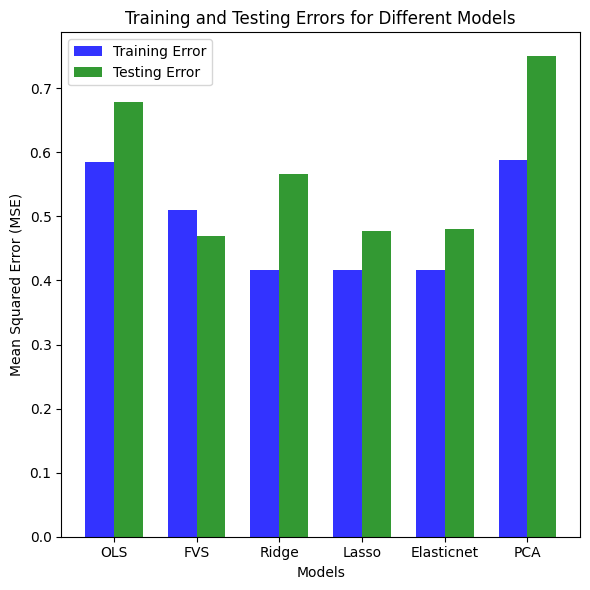

In [91]:
models = result['Model']
training_errors = pd.to_numeric(result['MSE(training)'])
testing_errors = pd.to_numeric(result['MSE(test)'])

# plotting
fig, ax = plt.subplots(figsize=(6, 6))

bar_width = 0.35
opacity = 0.8

indices = range(len(models))

rects1 = plt.bar(indices, training_errors, bar_width, alpha=opacity, color='b', label='Training Error')
rects2 = plt.bar([i + bar_width for i in indices], testing_errors, bar_width, alpha=opacity, color='g', label='Testing Error')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Testing Errors for Different Models')
plt.xticks([i + bar_width / 2 for i in indices], models)
plt.legend()

plt.tight_layout()
plt.show()


Let's summarize the results of the different regression models and discuss their main characteristics:

1-Ordinary Least Squares (OLS):

Characteristics:

OLS is a simple and widely used linear regression method.

The model's performance on the training set is moderate, but there is a noticeable drop in R-squared on the test set, indicating potential overfitting or a lack of generalization.


2-Forward Variable Selection (FVS):

Characteristics:

Forward Variable Selection is likely an additional preprocessing step rather than a standalone model.

The R-squared scores are relatively higher than OLS, indicating improved performance, and the MSE values are lower, suggesting better 
accuracy.


3-Ridge Regression:

Characteristics:

Ridge regression introduces regularization to prevent overfitting.

The model performs well in terms of R-squared on the test set, indicating improved generalization compared to OLS.
Ridge is effective in reducing multicollinearity and controlling model complexity.

4-Lasso Regression:

Characteristics:

Similar to Ridge, Lasso introduces regularization but tends to produce sparse models by encouraging some feature weights to be exactly zero.

The model performs well, with higher R-squared scores on both training and testing compared to Ridge.

5-ElasticNet Regression:

Characteristics:


ElasticNet combines L1 (Lasso) and L2 (Ridge) regularization.

It provides a balance between feature selection (like Lasso) and handling correlated features (like Ridge).

The performance is comparable to Lasso and Ridge in this case.


6-Principal Component Analysis (PCA):

Characteristics:


PCA is a dimensionality reduction technique that transforms features into a new set of uncorrelated variables (principal components).

The model's performance, as indicated by R2 and MSE, is not as strong as the other regression methods, suggesting that the reduced feature set might not capture the variance well.


General Observations:

Regularized models (Ridge, Lasso, ElasticNet) generally outperform OLS, indicating the importance of regularization in handling overfitting and improving generalization.

Forward Variable Selection appears to contribute positively to model performance.

Ridge and Lasso show similar performance in this case, with Lasso achieving slightly higher R-squared on the testing set.

ElasticNet provides a balance between feature selection and handling correlated features.

PCA, as a dimensionality reduction technique, might not capture the variance as effectively in this specific case.